# Graph for the percentage of students who didn't pass in one or more subjects

In [37]:
import pandas as pd
import plotly.express as px

# Read data
df_students = pd.read_excel("betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1B", skiprows=7, nrows=5)
Years = ['2018/19', '2019/20', '2020/21', '2021/22', '2022/23']


fig = px.line(x=Years, y=df_students['Totalt.2'], title='Percentage of Failed Students Over Years')


fig.update_xaxes(title_text='Years')


fig.update_yaxes(title_text='Percentage')

# Show the plot
fig.show()


# line graph of merit value for 16 subjects for total, girls and boys for academic years 18-23

In [38]:

fig = px.line(df_students, x=Years, y=['Flickor', 'Pojkar'], title='Comparison of Merit Value Between Male and Female Students',
              labels={'value': 'Merit Value'})

fig.update_yaxes(title_text='Merit Value for Male students', secondary_y=True)

fig.update_xaxes(title_text='Years')
# Show the plot
fig.show()



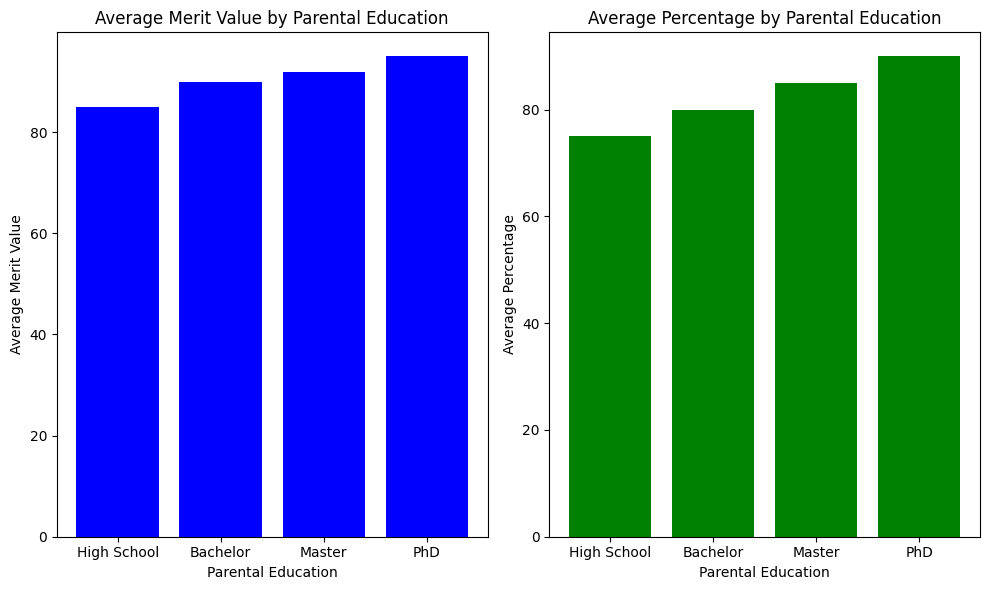

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace with your actual dataset)
data = {
    'Parental Education': ['High School', 'Bachelor', 'Master', 'PhD'],
    'Average Merit Value': [85, 90, 92, 95],
    'Average Percentage': [75, 80, 85, 90]
}

# Create a DataFrame from the sample data
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))

# Bar plot for Average Merit Value
plt.subplot(1, 2, 1)
plt.bar(df['Parental Education'], df['Average Merit Value'], color='blue')
plt.xlabel('Parental Education')
plt.ylabel('Average Merit Value')
plt.title('Average Merit Value by Parental Education')

# Bar plot for Average Percentage
plt.subplot(1, 2, 2)
plt.bar(df['Parental Education'], df['Average Percentage'], color='green')
plt.xlabel('Parental Education')
plt.ylabel('Average Percentage')
plt.title('Average Percentage by Parental Education')

plt.tight_layout()
plt.show()